In [1]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [20]:
url1 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-05-01&filingDateTo=2019-05-20&limit=100"
url2 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-05-21&filingDateTo=2019-05-31&limit=100"

In [21]:
ptab1 = requests.get(url1).json()
ptab2 = requests.get(url2).json()

In [24]:
ptab_df_1 = pd.DataFrame(ptab1['results'])
ptab_df_2 = pd.DataFrame(ptab2['results'])

In [27]:
ptab_df = pd.concat([ptab_df_1,ptab_df_2])

In [28]:
ptab_df = ptab_df.loc[:, ptab_df.columns!='links']

In [31]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [42]:
df.reset_index(drop=True).style.format({'patentNumber':make_clickable})


,accordedFilingDate,applicationNumber,filingDate,lastModifiedDatetime,patentNumber,patentOwnerName,petitionerPartyName,trialNumber
0,2019-05-17,12854598,2019-05-17,2019-05-23T15:11:32,8799088,"Rothschild, Leigh M.",Askeladden L.L.C.,IPR2019-00855
1,2019-05-17,12854598,2019-05-17,2019-05-23T15:09:56,8799088,"Rothschild, Leigh M.",Askeladden L.L.C.,IPR2019-00856
2,2019-05-02,13909649,2019-05-02,2019-06-03T18:30:23,8603044,Veasey et al,Pfizer Inc.,IPR2019-00977
3,2019-05-02,13909649,2019-05-02,2019-06-03T18:33:25,8603044,Veasey et al,Pfizer Inc.,IPR2019-00978
4,2019-05-02,12944544,2019-05-02,2019-06-03T18:47:12,8679069,Veasey et al,Pfizer Inc.,IPR2019-00979
5,2019-05-02,13909681,2019-05-02,2019-06-03T18:48:40,8992486,Veasey et al,Pfizer Inc.,IPR2019-00980
6,2019-05-02,13909681,2019-05-02,2019-06-03T18:50:31,8992486,Veasey et al,Pfizer Inc.,IPR2019-00981
7,2019-05-02,13909681,2019-05-02,2019-06-03T18:52:17,8992486,Veasey et al,Pfizer Inc.,IPR2019-00982
8,2019-05-02,14319388,2019-05-02,2019-06-03T18:54:05,9604008,Veasey et al,Pfizer Inc.,IPR2019-00987
9,2019-05-17,11084395,2019-05-11,2019-05-17T13:31:07,7305979,"Yehle, Craig T.","MCP IP, LLC",IPR2019-00990


Text(0, 0.5, 'Count of filings')

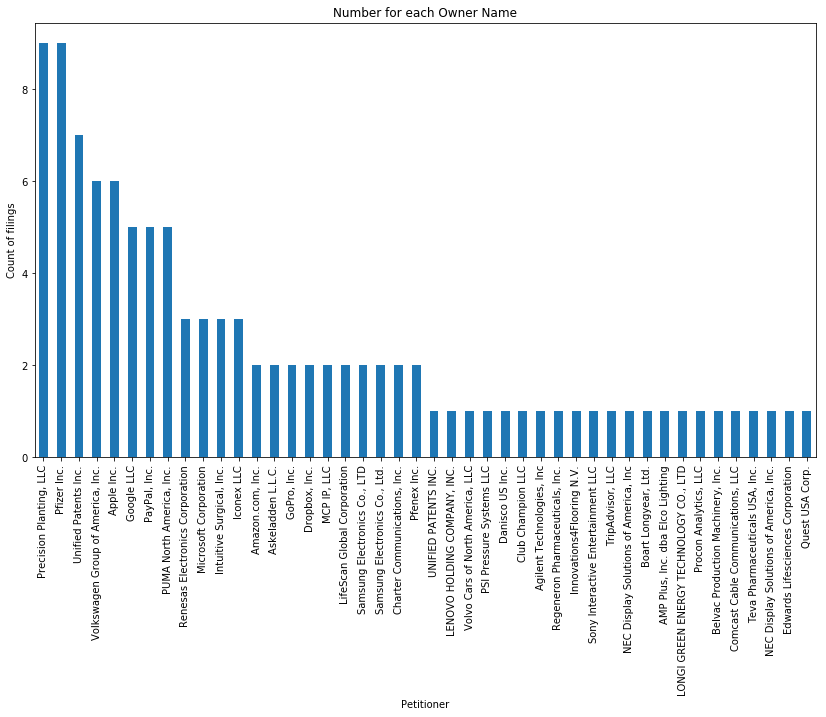

In [41]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")